In [25]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## **Load Data**

In [26]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
# train_test_split
X_train, y_train = train_df.drop(['Survived'], axis=1), train_df['Survived']

## **Install MLJAR**

In [29]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

## **Extended EDA**

Considering 7 the most frequent values
Considering 7 the most frequent values


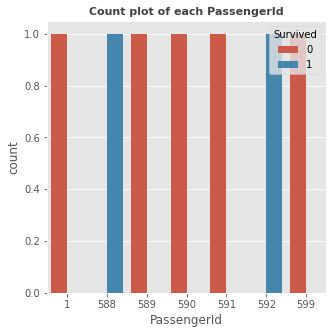

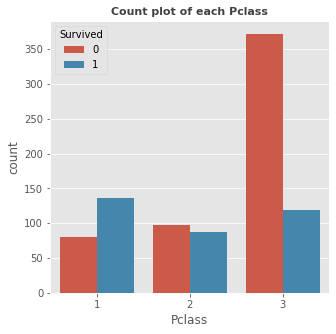

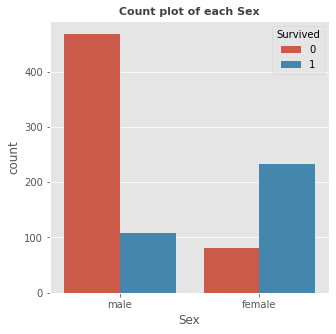

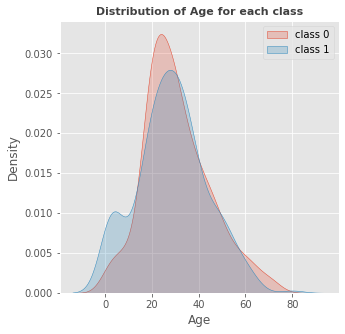

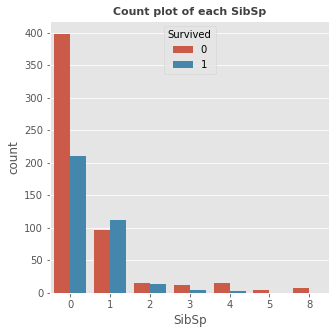

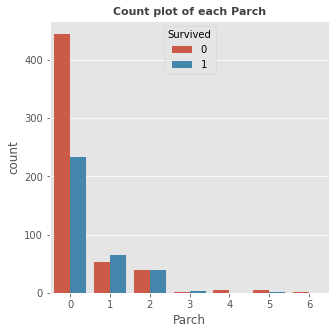

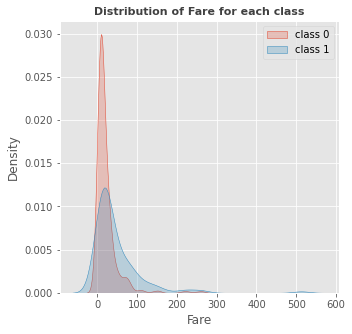

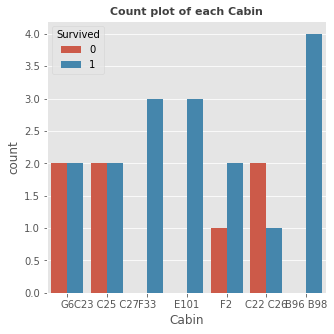

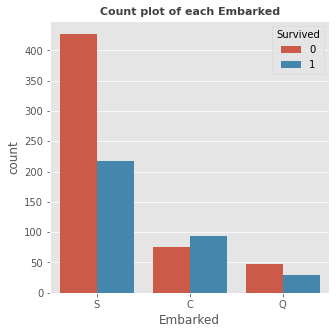

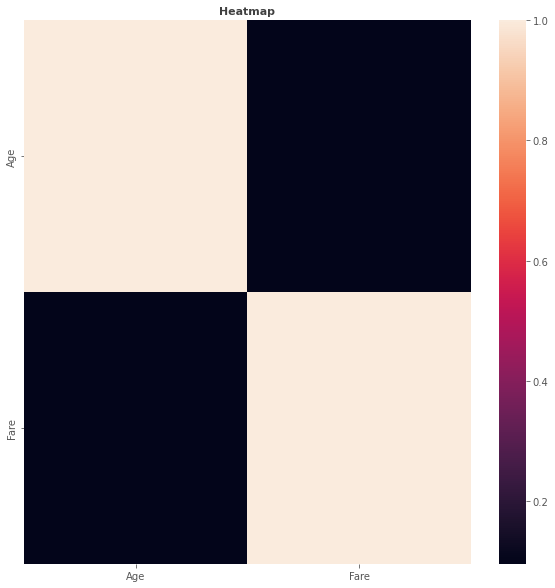

In [30]:
from supervised.preprocessing.eda import EDA

EDA.extensive_eda(X_train, y_train, save_path='./')

## **AutoML with raw data**

In [31]:
from supervised.automl import AutoML

automl_raw = AutoML(total_time_limit = 60*15,
                        model_time_limit = 60,
                        mode='Compete',
                        train_ensemble=True)
automl_raw.fit(X_train, y_train)

AutoML directory: AutoML_2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'mix_encoding', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.448533 trained in 1.32 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree logloss 0.451678 trained in 4.98 seconds
2_DecisionTree logloss 0.725608 trained in 4.63 seconds
3_DecisionTree 

AutoML(mode='Compete', model_time_limit=60, total_time_limit=900)

In [32]:
pd.set_option('display.max_rows', None)
automl_raw.get_leaderboard()

,name,model_type,metric_type,metric_value,train_time
0,1_DecisionTree,Decision Tree,logloss,0.451678,5.81
1,2_DecisionTree,Decision Tree,logloss,0.725608,5.47
2,3_DecisionTree,Decision Tree,logloss,0.703295,5.72
3,4_Linear,Linear,logloss,0.578918,10.47
4,5_Default_LightGBM,LightGBM,logloss,0.416312,6.98
5,6_Default_Xgboost,Xgboost,logloss,0.411820,11.38
6,7_Default_CatBoost,CatBoost,logloss,0.407769,9.89
7,8_Default_NeuralNetwork,Neural Network,logloss,1.184496,12.04
8,9_Default_RandomForest,Random Forest,logloss,0.405266,13.04
9,10_Default_ExtraTrees,Extra Trees,logloss,0.403380,13.53


In [33]:
automl_raw.report()

In [34]:
automl_raw.predict(test_df)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [35]:
submission_raw = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_raw['Survived'] = automl_raw.predict(test_df)

In [57]:
submission_raw.to_csv('submission_raw.csv')
submission_raw.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## **Additional Feature Engineering**

Since there are lots of null values in 'Age', filling age by using other features may be helpful.  
In this notebook, **'Name'** is used to fill values.

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# Extract 'Initial' from 'Name'

train_df['Initial'] = 0
for i in train_df:
    train_df['Initial'] = train_df.Name.str.extract('([A-Za-z]+)\.')
    
train_df['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [41]:
# replace misspelled initials

train_df['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'], 
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [42]:
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [43]:
# fill Age with mean age of Initials

train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Mr'), 'Age'] = 33
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Mrs'), 'Age'] = 36
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Master'), 'Age'] = 5
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Miss'), 'Age'] = 22
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Other'), 'Age'] = 46

In [44]:
train_df.Age.isnull().any()

False

In [45]:
# drop 'Name' and 'Initial'

train_df.drop(['Name', 'Initial'], axis=1, inplace=True)

In [50]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## **AutoML with preprocessed data**

In [47]:
from supervised.automl import AutoML

automl_preprocessed = AutoML(total_time_limit = 60*15,
                        model_time_limit = 60,
                        mode='Compete',
                        train_ensemble=True)
automl_preprocessed.fit(X_train, y_train)

AutoML directory: AutoML_3
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'mix_encoding', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.448533 trained in 3.92 seconds
Disable stacking for split validation
* Step simple_algorithms will try to check up to 3 models
2_DecisionTree logloss 0.461481 trained in 2.77 seconds
3_DecisionTree logloss 0.461027 trained in 2.85 seconds
4_Linear logloss 0.635357 trained in 4.55 seconds
* Step default_al

AutoML(mode='Compete', model_time_limit=60, total_time_limit=900)

In [49]:
pd.set_option('display.max_rows', None)
automl_preprocessed.get_leaderboard()

,name,model_type,metric_type,metric_value,train_time
0,1_DecisionTree,Decision Tree,logloss,0.448533,5.13
1,2_DecisionTree,Decision Tree,logloss,0.461481,4.01
2,3_DecisionTree,Decision Tree,logloss,0.461027,4.08
3,4_Linear,Linear,logloss,0.635357,5.63
4,5_Default_LightGBM,LightGBM,logloss,0.436562,4.04
5,6_Default_Xgboost,Xgboost,logloss,0.407907,4.72
6,7_Default_CatBoost,CatBoost,logloss,0.415030,4.18
7,8_Default_NeuralNetwork,Neural Network,logloss,0.446567,5.01
8,9_Default_RandomForest,Random Forest,logloss,0.407378,5.80
9,10_Default_ExtraTrees,Extra Trees,logloss,0.354778,5.51


In [52]:
automl_preprocessed.report()

In [53]:
automl_preprocessed.predict(test_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
submission_preprocessed = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_preprocessed['Survived'] = automl_preprocessed.predict(test_df)

In [56]:
submission_raw.to_csv('submission_preprocessed.csv')
submission_raw.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


AutoML with **preprocessed data** gives a better model.  
Still, understanding and preprocessing data is important!!⭐